In [5]:
# Importamos las librerías
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics.cluster import entropy
from skimage.morphology import opening, closing

In [6]:
def process_image(i, subfolder1, extension):
    def get_current_and_thresholded_images(i, subfolder2, extension):
        # Leemos la imagen en blanco y negro
        img = cv2.imread("images/"+subfolder2+"/"+str(i)+"."+extension, 0)

        # Calcula la inversión bit a bit, o NOT bit a bit, elemento a punto
        invImg = np.invert(img)

        # Aplicamos apertura y clausura
        im2 = opening(image = invImg)
        im3 = closing(image = im2)

        display("Entropía "+subfolder2.split("/")[0]+" "+str(i)+": "+str(entropy(im3)))

        # Obtenemos la umbralización de im3, donde 130 es el umbral usado para clasificar los valores de los pixeles, 
        # 255 es el valor máximo que se asigna a los valores de píxel que superan el umbral, y THRESH_BINARY es la umbralización básica.
        # Esto con el fin de resaltar los pulmones
        _, thresholdedImg = cv2.threshold(im3, 130, 255, cv2.THRESH_BINARY)

        return img, thresholdedImg

    original, thresholdedOriginal = get_current_and_thresholded_images(i, "originales/"+subfolder1, extension)
    clahe, thresholdedCLAHE = get_current_and_thresholded_images(i, "CLAHE/"+subfolder1, extension)

    # Gráficas
    fig, axs = plt.subplots(1, 4)
    fig.set_figheight(20)
    fig.set_figwidth(15)

    # imagen original
    axs[0].imshow(original, cmap='gray'),axs[0].axis('off'),axs[0].set_title('Original: ' + str(i)) 
    
    # imagen con umbral
    axs[1].imshow(thresholdedOriginal, cmap='gray'),axs[1].axis('off'),axs[1].set_title('Original con umbral: '+ str(i)) 

    # imagen original CLAHE
    axs[2].imshow(clahe, cmap='gray'),axs[2].axis('off'),axs[2].set_title('CLAHE: ' + str(i)) 
    
    # imagen CLAHE con umbral
    axs[3].imshow(thresholdedCLAHE, cmap='gray'),axs[3].axis('off'),axs[3].set_title('CLAHE con umbral: '+ str(i)) 

## Imágenes de personas sanas

'Entropía originales 1: 5.516292008144021'

'Entropía CLAHE 1: 5.512033351824481'

'Entropía originales 2: 5.43711888927743'

'Entropía CLAHE 2: 5.4514132044667125'

'Entropía originales 3: 5.160219635644607'

'Entropía CLAHE 3: 5.22400485044941'

'Entropía originales 4: 5.3033138945595635'

'Entropía CLAHE 4: 5.3622485194444875'

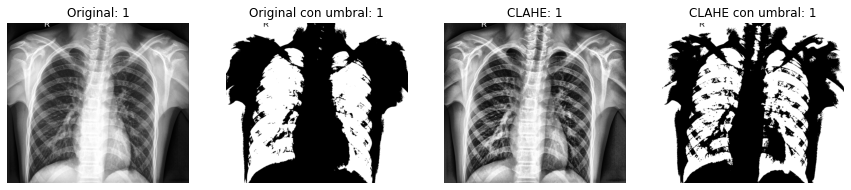

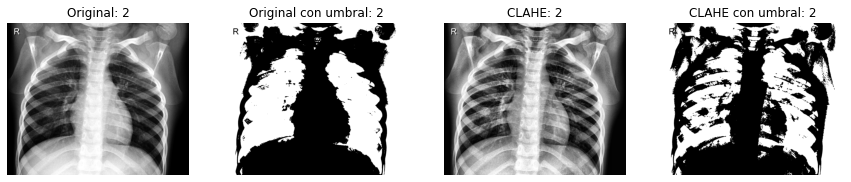

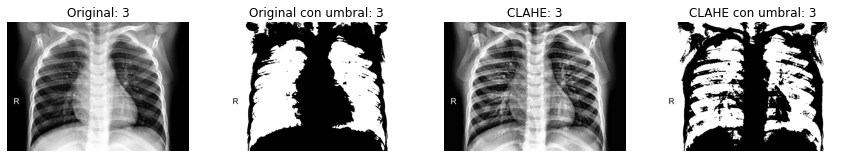

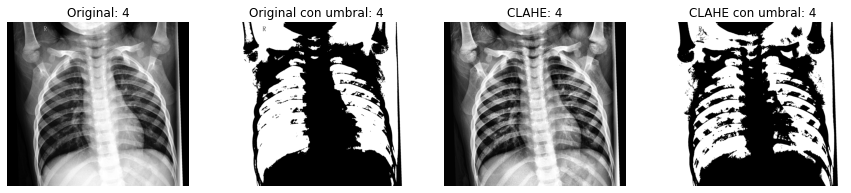

In [7]:
for i in range(1, 5):
    process_image(i, "sanas", "jpeg")

## Imágenes de personas con COVID-19

'Entropía originales 1: 5.0593818422859895'

'Entropía CLAHE 1: 5.21954342601885'

'Entropía originales 2: 5.119709708858007'

'Entropía CLAHE 2: 5.248737496157789'

'Entropía originales 3: 4.917502381749053'

'Entropía CLAHE 3: 5.042323322328972'

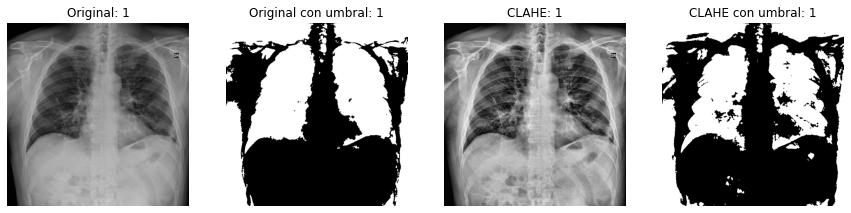

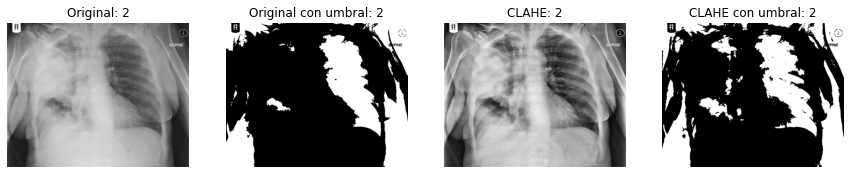

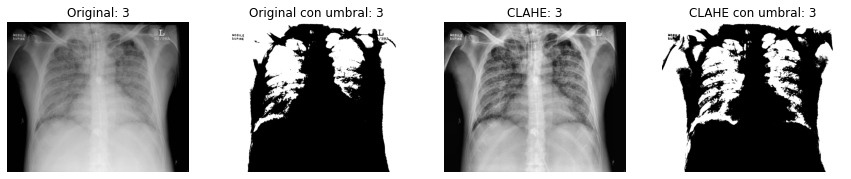

In [8]:
for i in range(1, 4):
    process_image(i, "covid", "jpg")